In [2]:
import streamlit as st
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.signal import decimate
import sys
import os
sys.path.append(os.path.abspath(".."))
import openpyxl
from preprocessing.features.its_compressibility import compute_its_compressibility
from utils.audio_io import load_audio
from utils.plot_utils import plot_takens_embedding, plot_winding_xy
from preprocessing.signal_processing.preprocessing import preprocess_signal, prepare_signal
from preprocessing.features.winding import get_winding_curve
from preprocessing.signal_processing.fourier import apply_fft, get_dominant_frequencies
from preprocessing.features.its import extract_its
from preprocessing.features.features_extractor import extract_features_from_segmented_signal
from preprocessing.features.mfcc import extract_mfcc_features
from preprocessing.features.wavelet import  extract_wavelet_features
from preprocessing.segment_signal import segment_signal
from preprocessing.features.takens_rqa import extract_rqa_features
%matplotlib inline


In [3]:
nome_do_arquivo = "../data/raw/HeartANDLung_Sounds_Dataset/Mix/Mix/H0001.wav"
file_id = os.path.basename(nome_do_arquivo).replace(".wav", "")

### Carregando o arquivo de áudio
* fs ==> taxa de amostragem
* signal ==> vetor de amostras

In [4]:
fs, signal = load_audio(
    nome_do_arquivo)

In [5]:
signal

array([-8, -9, -9, ...,  2,  1,  0], dtype=int16)

### Iniciando a pré-filtragem/pré-processamento do sinal
A função `preprocess_signal` faz aplica:
* normalização do sinal
* Filtro passa-banda
* Filtro Binominal ou Filtro de Kalman

In [ ]:

signal, fs = prepare_signal(signal, fs, max_audio_duration=5, decimation_factor=10,use_kalman=True)

In [ ]:
df = extract_features_from_segmented_signal(
    signal=signal,
    fs=fs, 
    file_id=nome_do_arquivo,
    extract_its_fn=extract_its,
    fft_fn=apply_fft,
    get_dom_freqs_fn=get_dominant_frequencies,
    extract_mfcc_fn=extract_mfcc_features,
    extract_wavelet_fn=extract_wavelet_features,
    extract_rqa_fn=extract_rqa_features,
    window_duration_sec=1.0,
    overlap=0.2,
    threshold=0.5,
    duration=1.0,
    n_mfcc=13
)

c:\Users\pflss\miniconda3\envs\sensory-translation\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=400
  warnings.warn(


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 63 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   freq                        54 non-null     float64
 1   centro_x                    54 non-null     float64
 2   centro_y                    54 non-null     float64
 3   raio_medio                  54 non-null     float64
 4   raio_std                    54 non-null     float64
 5   raio_max                    54 non-null     float64
 6   raio_min                    54 non-null     float64
 7   simetria_x                  54 non-null     float64
 8   simetria_y                  54 non-null     float64
 9   densidade_nucleo            54 non-null     float64
 10  comprimento_curva           54 non-null     float64
 11  variacao_curvatura          54 non-null     float64
 12  mudanca_media_direcao       54 non-null     float64
 13  entropia_raio               54 non-nu

In [8]:
nome = os.path.basename(nome_do_arquivo).replace(".wav", "")
df.to_excel(f"../datasets/raw/{nome}_features.xlsx", index=False)

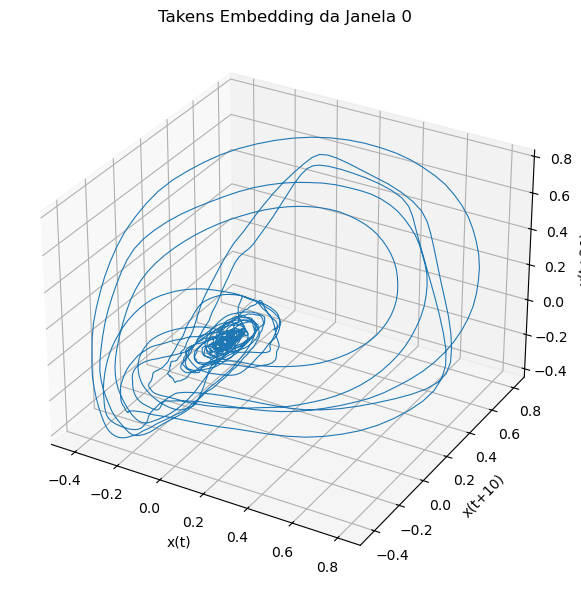

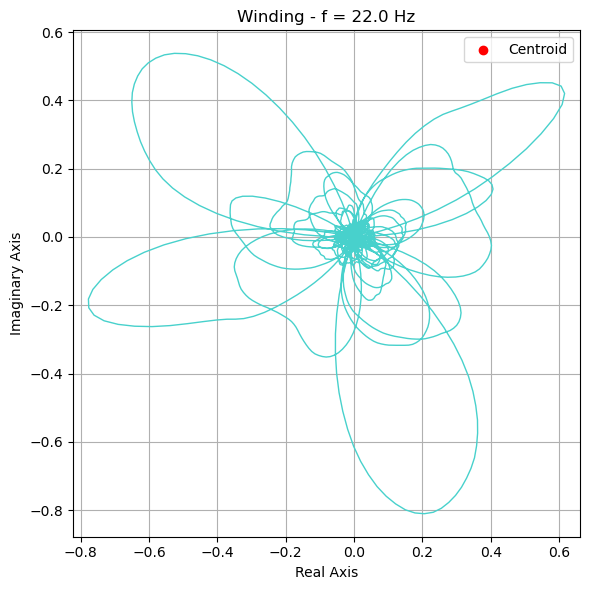

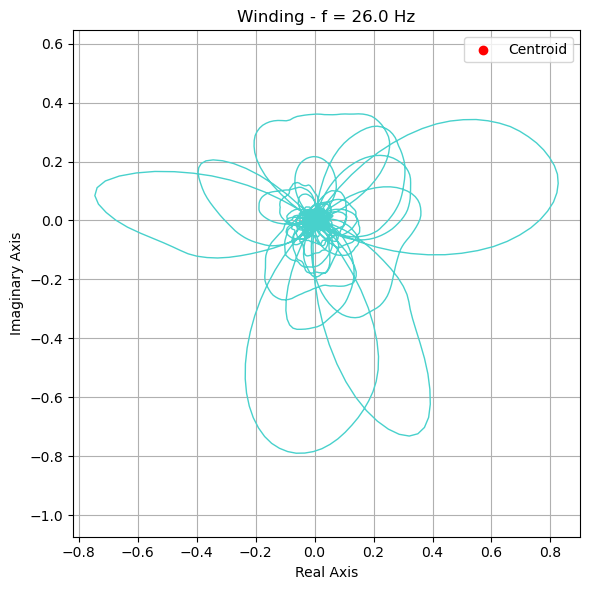

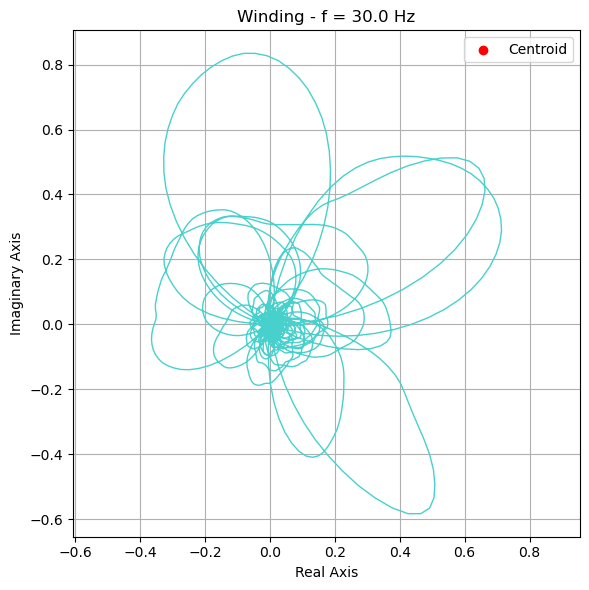

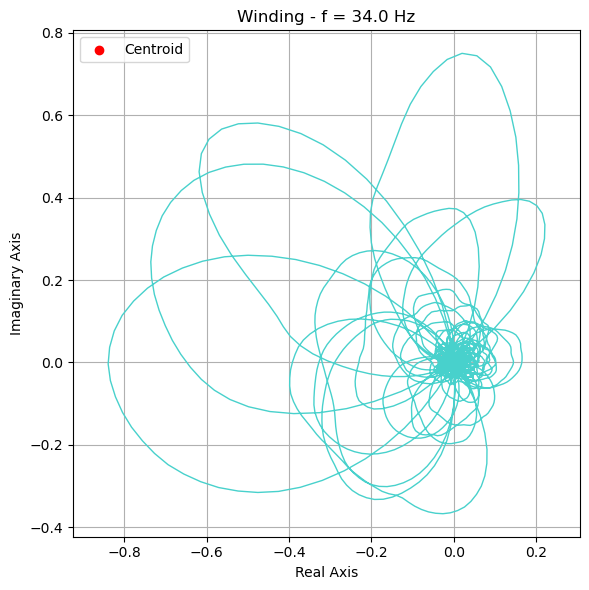

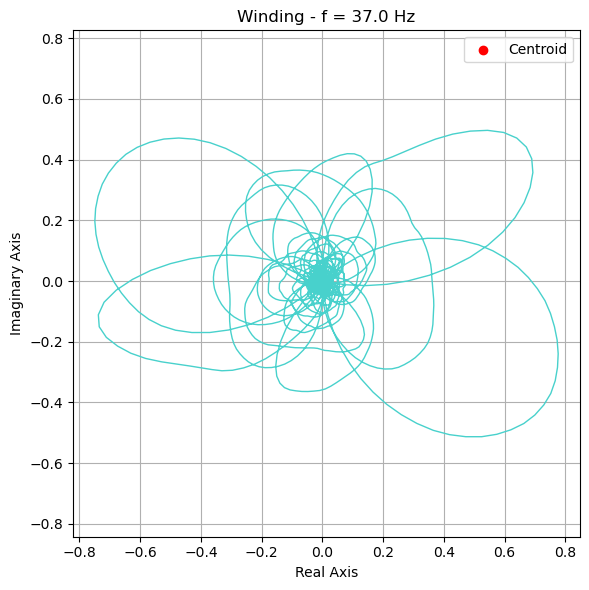

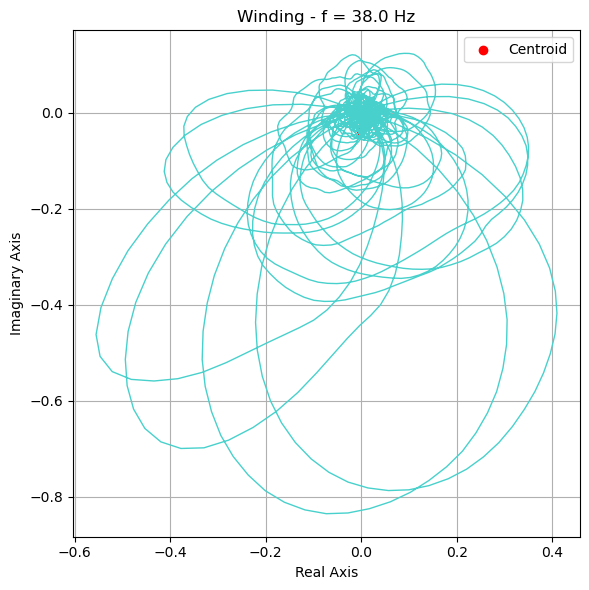

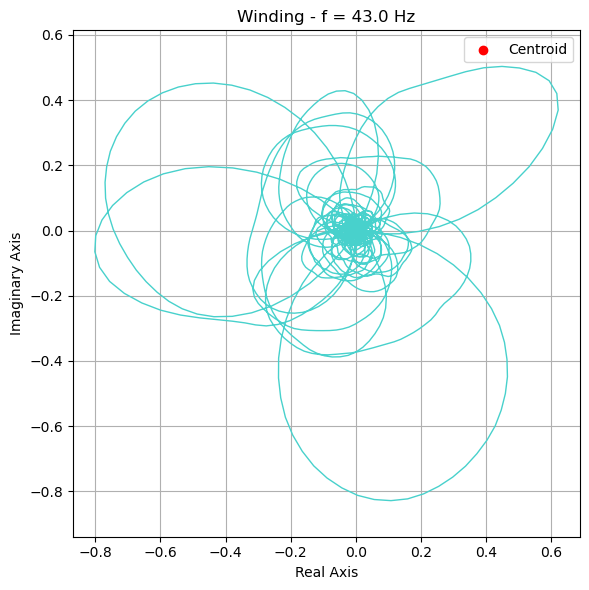

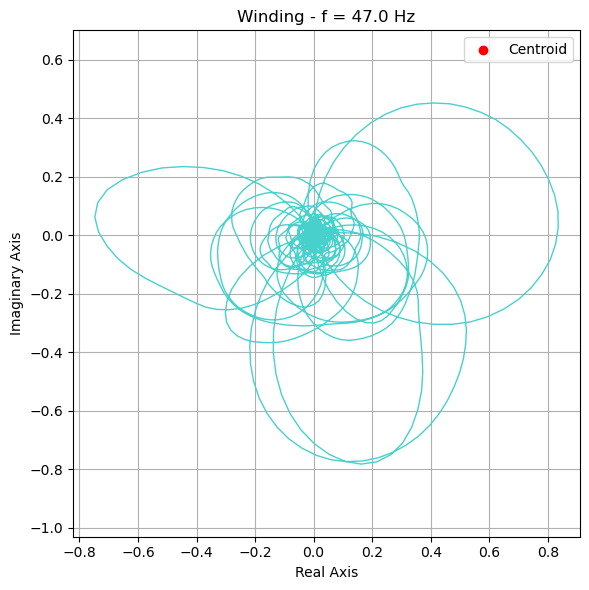

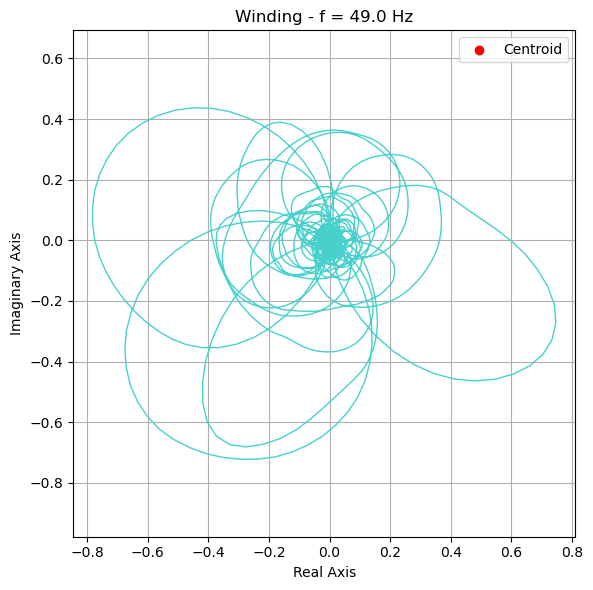

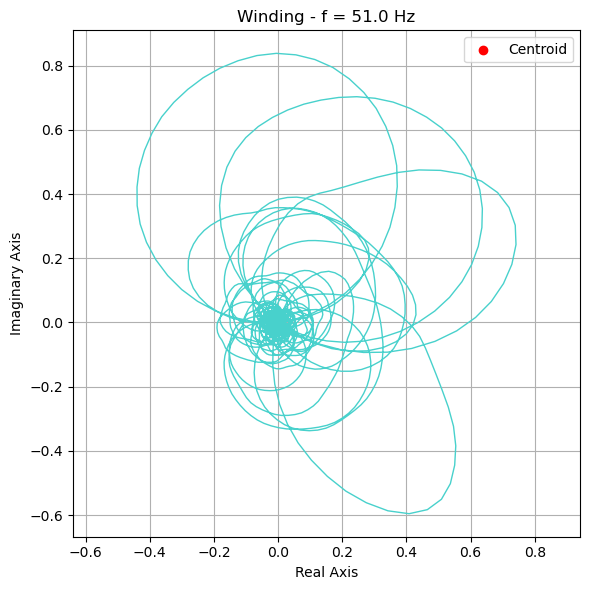

In [ ]:
# PLOT DAS  TAKENS EMBEDDINGS
segments = segment_signal(signal, fs, window_duration_sec=1.0, overlap=0.5)
plot_takens_embedding(segments[5], tau=10, dim=3,
                      title="Takens Embedding da Janela 0")

# PLOT DAS WINDINGS
freqs, mags, _ = apply_fft(segments[5], fs)
dominantes = get_dominant_frequencies(freqs, mags, threshold=0.5)

for f in dominantes:
    x,y = get_winding_curve(signal, fs, freq=f, duration=1.0)
    plot_winding_xy(x,y, title=f"Winding - f = {f} Hz")